# Information geometry of Physics-Informed statistical manifolds and its use in data assimilation

We consider here Example 1 from the paper, which aims at reducing uncertainty on the estimate of the state variable which obeys a Langevin equation in the form

$\frac{dx}{dt} = -a(t) x(t)$

subject to deterministic initial condition $x(t=0) = x_0^\star$. $a(t)$ is a statistically homogeneous random process with constant mean $\mu_a$ and standard deviation $\sigma_a$. The meta-parameters $\varphi = \{ \mu_a, \sigma_a\}$ characterize the noise within the Langevin equation. 

The PDF/CDF of $x(t)$, $f(X,t;\varphi) / F(X,t;\varphi)$ can be computed analytically in this case, as well as the derivatives with respect to $\varphi$. 

We utilize observations to improve the prior knowledge of the meta-parameters $\varphi^{(0)}$. 

In [149]:
# loading packages and functions

import matplotlib
import matplotlib.pyplot as plt
from mpmath import *
import numpy as numpy
import scipy as sp
from six.moves import xrange
from scipy.optimize import minpack2
from scipy.integrate import quad
from scipy.stats import norm, uniform, beta, lognorm
from pynverse import inversefunc
import warnings
from warnings import warn
from numpy import (atleast_1d, eye, mgrid, argmin, zeros, shape, squeeze,
                   vectorize, asarray, sqrt, Inf, asfarray, isinf)
import tensorflow as tf
from tensorflow.python.ops import math_ops
import numpy as np
import time
#plt.rcParams["font.family"] = "Times New Roman"
# from matplotlib import rc
from fipy import *
import pickle
from pynverse import inversefunc
plt.rcParams["font.family"] = "Times New Roman"

# This is a slightly modified version of the natgradoptimization_functions.py routine
exec(open('natgradoptimization_functions_noconj.py').read())

exec(open('analytical_solutions.py').read())

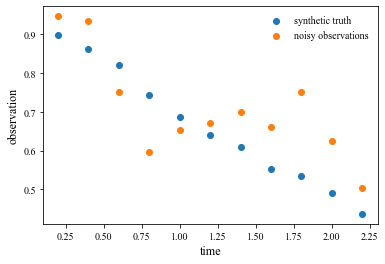

In [150]:
# INPUTS

# MEASUREMENTS
Nmeas = 11

tend = 2.2
tmeas = np.linspace(.2,tend,Nmeas)
sdnoise = .1
phionethreshold = .0001*sdnoise

# observations including noise
obsR = np.array([[0.94617714, 0.93428363, 0.75152971, 0.59630183, 0.65308407,
        0.67082182, 0.69925186, 0.65963883, 0.75023038, 0.62444984,
        0.50380226]])

# synthetic truth
solR = np.array([[0.89875959, 0.86202108, 0.82130374, 0.74254554, 0.68678323,
        0.64060852, 0.60947474, 0.55163101, 0.53415108, 0.49104131,
        0.43686716]])

np.random.seed(2290)
abarR = np.random.rand(1)
CVR = .2
stdevR = CVR*abarR
varR = stdevR**2

theta1R = abarR/stdevR
theta2R = np.log(stdevR)

plt.figure()
scatt1 = plt.scatter(tmeas[:],solR[0,:])
scatt2 = plt.scatter(tmeas[:],obsR[0,:])
legend = plt.legend((scatt1,scatt2), ('synthetic truth', 'noisy observations'), loc = 'upper right', frameon = False)
plt.xlabel('time',fontsize=12, fontname='Times New Roman')
plt.ylabel('observation',fontsize=12, fontname='Times New Roman')
plt.show()

# INITIAL CONDITIONS
X0 = 1.
W0 = 0. # initial conditions for the remapped variable (w(t) = - exp^- \theta_2 \ln x(t))

Xmin = 0.
Xmax = X0 

NXMD = 1000
XMD = np.linspace(Xmin,Xmax,NXMD)

# META-PARAMETERS
Nphi = 2

abarinit = 1.25
astdevinit = .2

theta1init = abarinit/astdevinit
theta2init = np.log(astdevinit) # to enforce positivity of sigmaa when looking for it.

# LOSS FUNCTIONS
Ndiv = 3 # number of divergencies to be tested: KL, W2 and L2
Nopt = 2 # optimization: GD and NGD

# INITIALIZATIONS
phiseq = np.zeros((Nmeas+1,Nphi,Nopt,Ndiv))   # updating the meta-parameters
Niterations = (np.zeros((Nmeas+1,Nopt,Ndiv))) # updating the N of iterations per assimilation step

phiinit = [abarinit,astdevinit]

for io in range(0,Nopt):
    for idiv in range(0,Ndiv):
        phiseq[0,:,io,idiv] = phiinit 


# KL divergence assimilation

$D = d_{KL}$ at each assimilation time


In [151]:
idiv = 0 # identifier for the KL divergence option

We consider both the GD (iopt = 0) and NGD (opt = 1) minimization algorithms. 

In [152]:
iopt=0

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


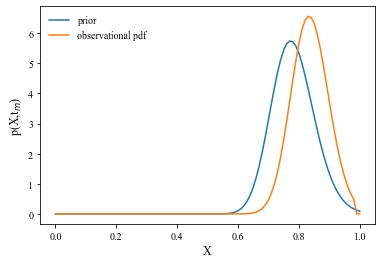

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

         Current function value: 0.025380
         Iterations: 14
         Function evaluations: 71
         Gradient evaluations: 60


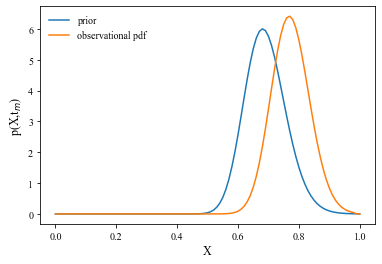

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

         Current function value: 0.002746
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101


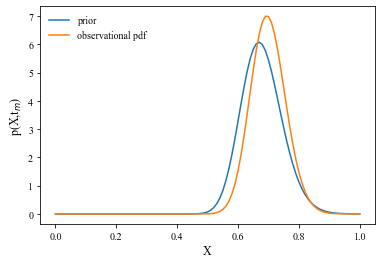

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000503
         Iterations: 9
         Function evaluations: 21
         Gradient evaluations: 21


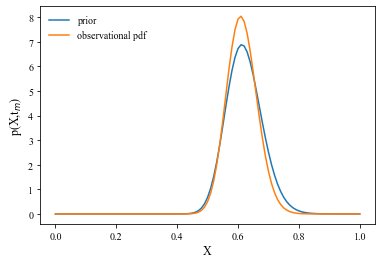

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000305
         Iterations: 7
         Function evaluations: 16
         Gradient evaluations: 16


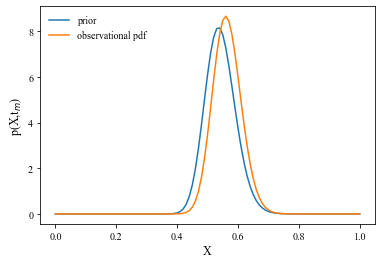

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000204
         Iterations: 5
         Function evaluations: 13
         Gradient evaluations: 13


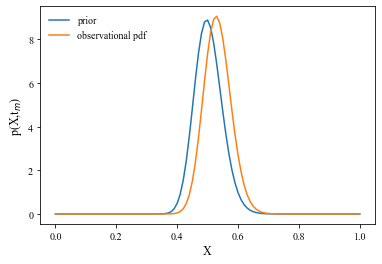

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000161
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 12


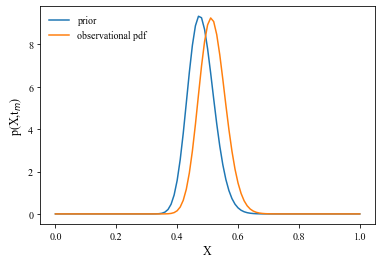

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000141
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8


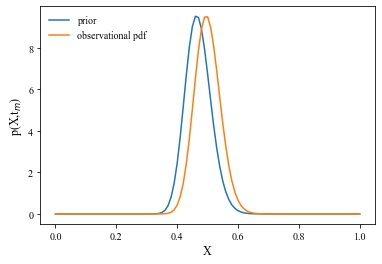

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000129
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9


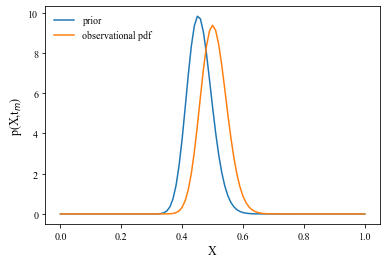

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000124
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9


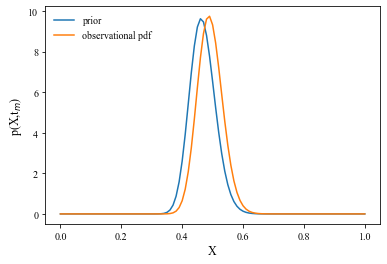

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000120
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9


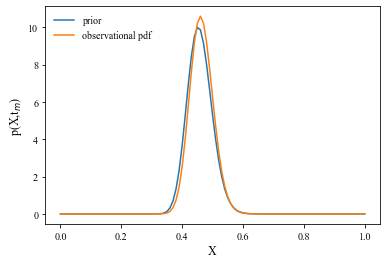

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000094
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9


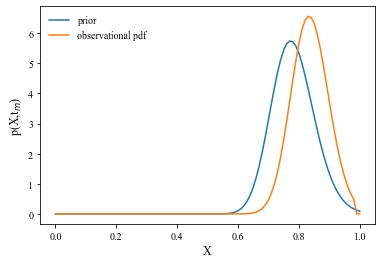

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.024302
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4


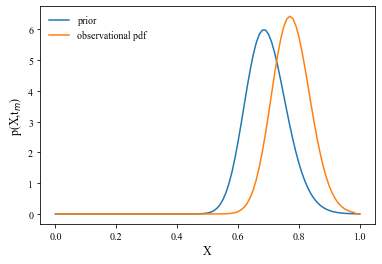

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.002939
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4


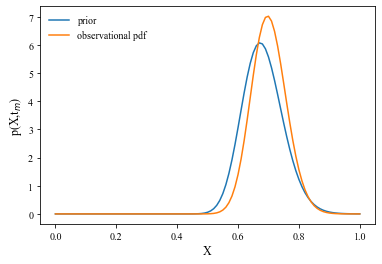

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.000626
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


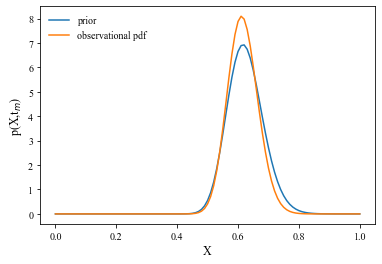

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.005339
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


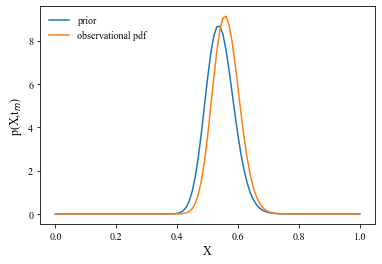

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.003363
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


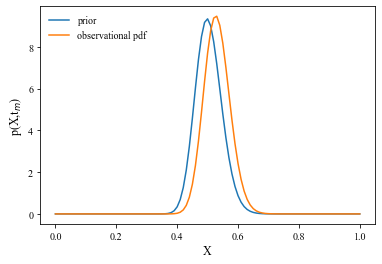

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.004221
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


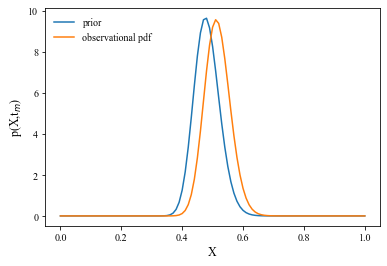

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.004768
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


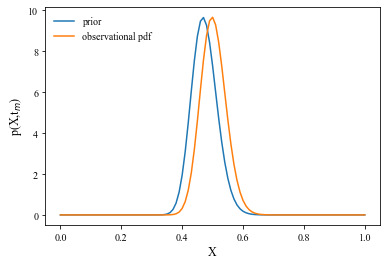

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.003892
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


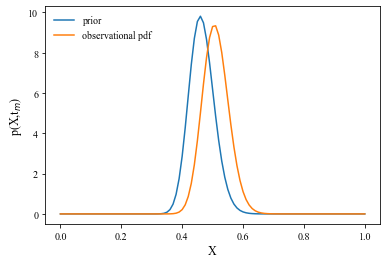

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.005186
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


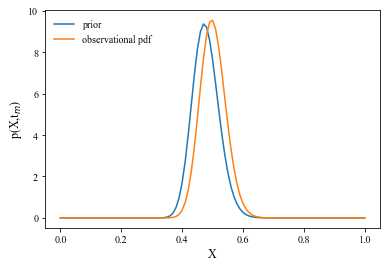

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

Optimization terminated successfully.
         Current function value: 0.003337
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


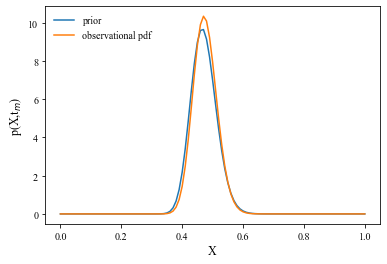

Optimization terminated successfully.
         Current function value: 0.012581
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7

In [153]:
for iopt in range(0,Nopt):
    for imm in range(0,Nmeas):
        
        # current assimilation data
        tm = tmeas[imm]
        dm = obsR[0,imm]
        phicurrent = phiseq[imm,:,iopt,idiv]
        
        NXOBS = 100
        xx = np.linspace(Xmin,Xmax,NXOBS+1)

        # observational pdf
        normconst = normconstBseq(tm,dm,phicurrent,sdnoise,Xmin,Xmax)
        pobsa = np.zeros(NXOBS+1)
        Fobsmon = np.zeros(NXOBS+1)
        
        for ix in range(0,NXOBS+1):
            pobsa[ix] = pobs(xx[ix],tm,dm,phicurrent,sdnoise,normconst)
        
        ic = np.argmin(np.abs(xx-analyticalx(X0,tm,phicurrent))) 
    
        arrL1o = np.array(np.where(pobsa[0:ic] < 0.))
        arrR1o = np.array(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)

        idL1o = 0
        idL2o = 0
        idR1o = NXOBS
        idR2o = NXOBS
        if arrL1o.size > 0:
            idL1o = np.max(np.where(pobsa[0:ic] < 0.001))
        if arrR1o.size > 0:
            idR1o = np.min(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
        idLo = np.max([idL1o,idL2o,0])
        idRo = np.min([idR1o,idR2o,NXOBS-1])
    
        normconstnew = normconstBseq(tm,dm,phicurrent,sdnoise,xx[idLo],xx[idRo])

        pobsa = pobsa*normconst/normconstnew
        
        pobsa[0:idLo] = 0.
        pobsa[idRo:NXOBS+1] = 0.

        x_s = np.zeros((NXOBS+1,1)) 
        phi0_s = np.zeros((NXOBS+1,1)) 
        phi1_s = np.zeros((NXOBS+1,1)) 
        t_s = np.zeros((NXOBS+1,1)) 
    
        x_s[:,0] = xx
        phi0_s[:,0] = phicurrent[0]
        phi1_s[:,0] = phicurrent[1]
        t_s[:,0] = tm
        
        # prior at the current assimilation step
        p_s = model0predictPDF(x_s,phi0_s,phi1_s,t_s)
#         F_s = model0predictCDF(x_s,phi0_s,phi1_s,t_s)
        pobsa[0] = 0.
        p_s[0] = 0.
        
        plt.figure()
        line1, = plt.plot(xx,p_s)
        line2, = plt.plot(xx,pobsa)
        legend = plt.legend((line1,line2), ('prior', 'observational pdf'), loc = 'upper left', frameon = False)
        plt.xlabel('X',fontsize=12, fontname='Times New Roman')
        plt.ylabel(r'p(X,t$_m$)',fontsize=12, fontname='Times New Roman')
        plt.show()
        
        if iopt == 0: # GD
            optout = fmin_ngdFG(loss2,phicurrent,fprime=gradloss2,args=(idiv,tm,dm,phicurrent,sdnoise,),gtol=1e-02,retall = True, full_output = True)
        elif iopt == 1: # NGD
            optout = fmin_ngdFG(loss2,phicurrent,fprime=gradloss3,args=(idiv,tm,dm,phicurrent,sdnoise,),gtol=1e-02,retall = True, full_output = True)
    
        phiseq[imm+1,:,iopt,idiv] = np.abs(optout[0])
        Niterations[imm+1,iopt,idiv] = np.shape(optout[5])[0]

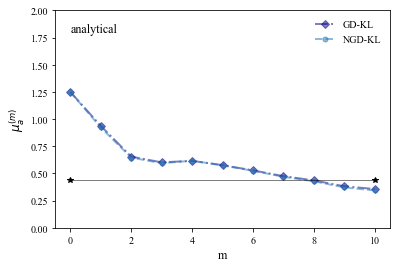

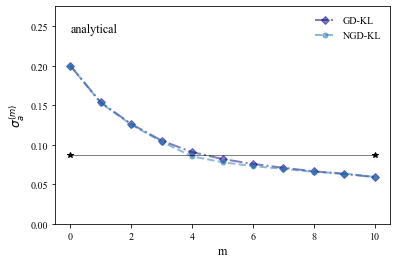

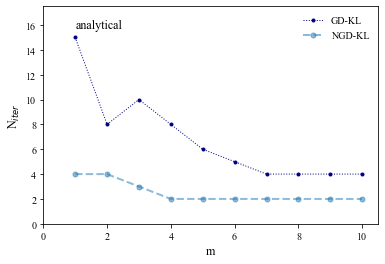

In [154]:
plt.figure()
idiv = 0
iphi = 0
iopt=0
line1, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='navy',marker='D', linewidth=2,alpha=.5) 
iopt=1
line2, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#1f77b4',marker='o',markersize = 5,linewidth=2,alpha=.5) 
legend = plt.legend((line1,line2), ('GD-KL', 'NGD-KL'), loc = 'upper right', frameon = False)

plt.plot([0,10],[abarR[0],abarR[0]],marker='*',color='k',linewidth=.5)
plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\mu_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,2.)
plt.text(0, 1.8, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

plt.figure()
iphi = 1
iopt=0
line1, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='navy',marker='D', linewidth=2,alpha=.5) 
iopt=1
line2, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#1f77b4',marker='o',markersize = 5,linewidth=2,alpha=.5) 
legend = plt.legend((line1,line2), ('GD-KL', 'NGD-KL'), loc = 'upper right', frameon = False)

plt.plot([0,10],[stdevR[0],stdevR[0]],marker='*',color='k',linewidth=.5)
#plt.plot([obsR[ia,Nmeas-2],obsR[ia,Nmeas-2]],[0.,19.5],marker='o',color='k',linestyle='--')

plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\sigma_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,.275)
plt.text(0, .2425, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

plt.figure()
iphi = 0
iopt = 0 
line1, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = ':',color='navy',marker='o',markersize = 3, linewidth=1,alpha=1.) # this is opt 1 idiv 0
iopt=1
line2, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '--',color='#1f77b4',marker='o',markersize = 5,linewidth=2,alpha=.5) # this is opt 3 idiv 0
legend = plt.legend((line1,line2), ('GD-KL', 'NGD-KL'), loc = 'upper right', frameon = False)
plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'N$_{{iter}}$',fontsize=12, fontname='Times New Roman')
plt.xlim(0,10.5)
plt.ylim(0,17.5)
plt.text(1, 17.5*1.8/2, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

# W2 discrepancy

$D = \frac{1}{2} W_2^2$ at each assimilation time


In [155]:
idiv = 1

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


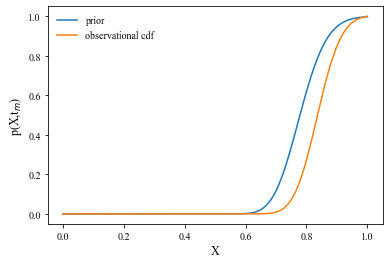

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

         Current function value: 0.000009
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 40


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


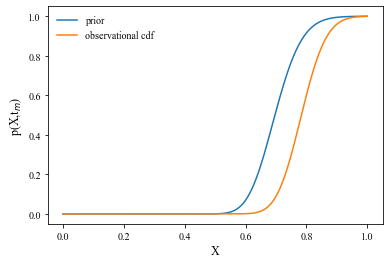

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 5
         Function evaluations: 14
         Gradient evaluations: 14


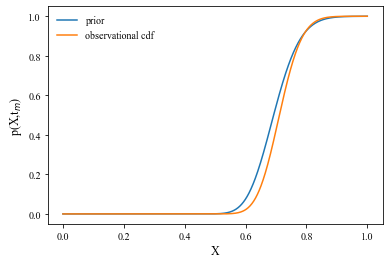

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9


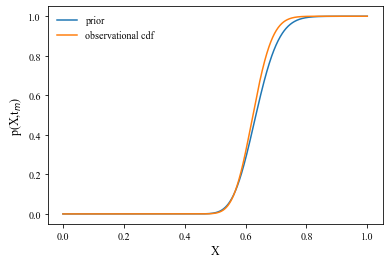

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


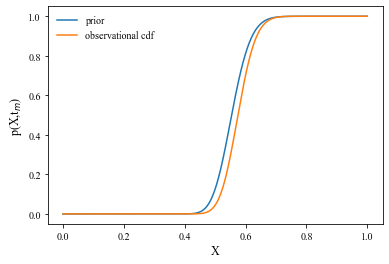

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8


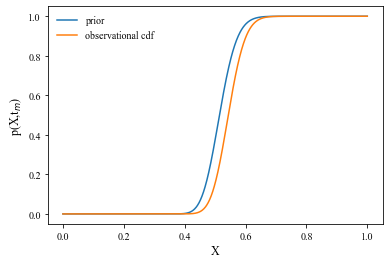

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9


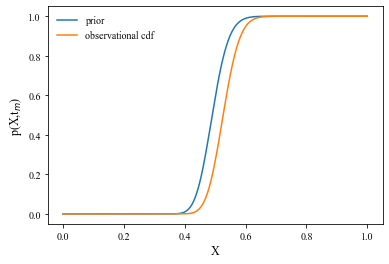

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9


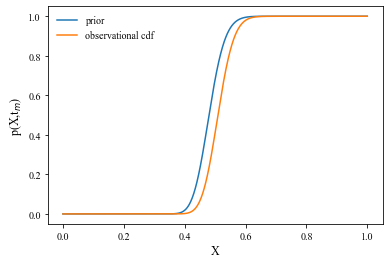

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 11
         Gradient evaluations: 11


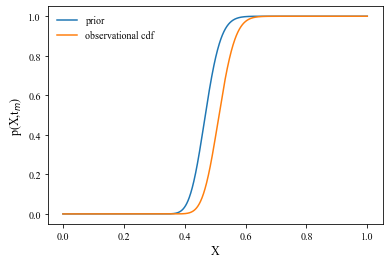

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9


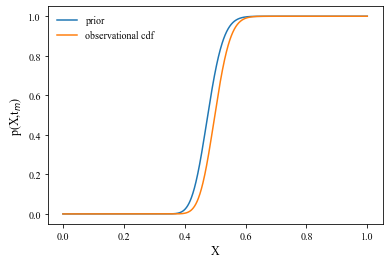

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7


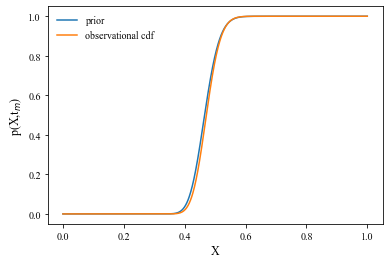

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6


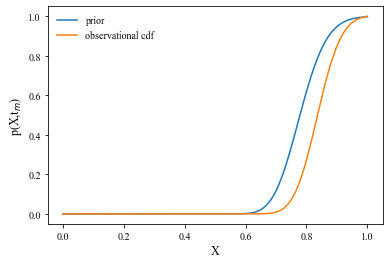

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

         Current function value: 0.000009
         Iterations: 2
         Function evaluations: 108
         Gradient evaluations: 96


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


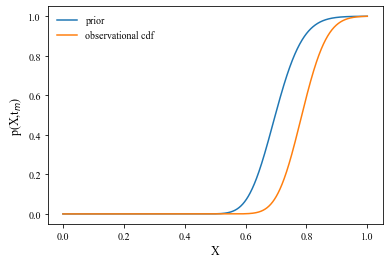

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

         Current function value: 0.000005
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


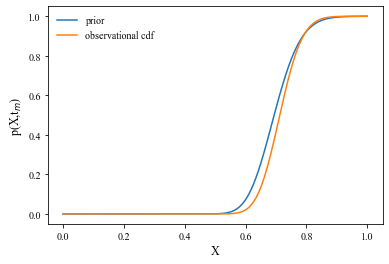

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


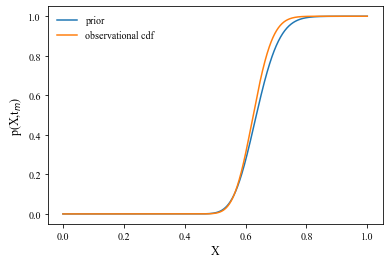

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


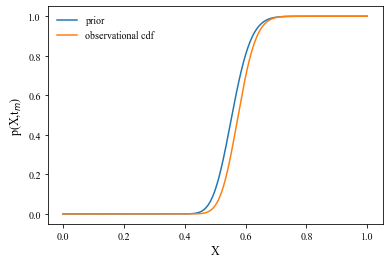

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


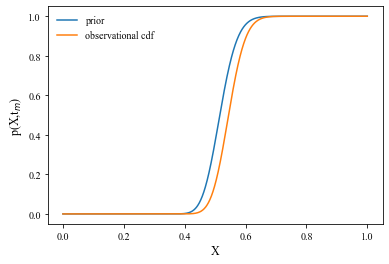

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


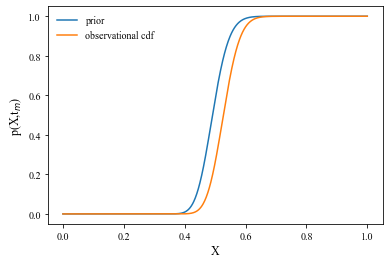

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


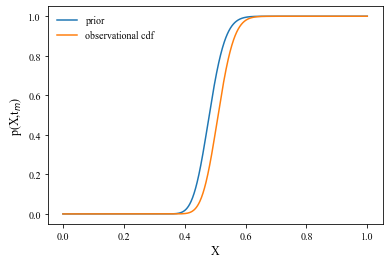

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


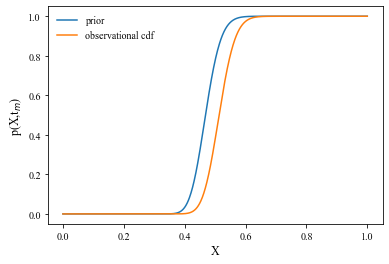

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


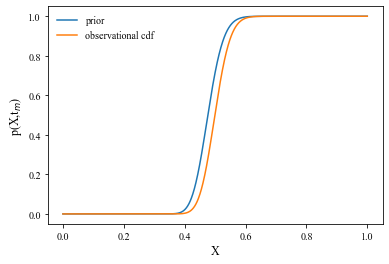

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


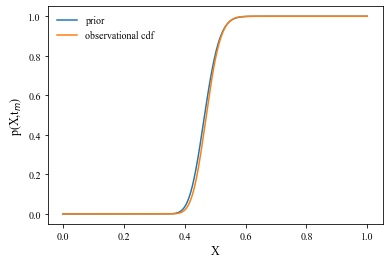

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


In [156]:
for iopt in range(0,Nopt):
    for imm in range(0,Nmeas):
        
        # current assimilation data
        tm = tmeas[imm]
        dm = obsR[0,imm]
        phicurrent = phiseq[imm,:,iopt,idiv]
        
        NXOBS = 1000
        xx = np.linspace(Xmin,Xmax,NXOBS+1)

        # observational pdf
        normconst = normconstBseq(tm,dm,phicurrent,sdnoise,Xmin,Xmax)
        pobsa = np.zeros(NXOBS+1)
        Fobsa = np.zeros(NXOBS+1)
        Fobsmon = np.zeros(NXOBS+1)
        
        for ix in range(0,NXOBS+1):
            if ix==0:
                pobsa[ix] = 0.
            else:
                pobsa[ix] = pobs(xx[ix],tm,dm,phicurrent,sdnoise,normconst)
            Fobsa[ix] = np.trapz(pobsa[0:ix],x=xx[0:ix]) 
    
        ic = np.argmin(np.abs(xx-analyticalx(X0,tm,phicurrent))) 
    
        arrL1o = np.array(np.where(pobsa[0:ic] < 0.))
        arrR1o = np.array(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
        arrL2o = np.array(np.where(Fobsa[0:ic] < 0.))
        arrR2o = np.array(np.where(Fobsa[ic:NXOBS+1] > 1.)+ic)
        
        idL1o = 0
        idL2o = 0
        idR1o = NXOBS
        idR2o = NXOBS
        if arrL1o.size > 0:
            idL1o = np.max(np.where(pobsa[0:ic] < 0.001))
        if arrR1o.size > 0:
            idR1o = np.min(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
        if arrR1o.size > 0:
            idR1o = np.min(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
        if arrR2o.size > 0:
            idR2o = np.min(np.where(Fobsa[ic:NXOBS+1] > 1.)+ic)
        idLo = np.max([idL1o,idL2o,0])
        idRo = np.min([idR1o,idR2o,NXOBS-1])

        Fobsa[0:idLo] = 0.
        Fobsa[idRo:NXOBS+1] = 1.
        Fobsa[NXOBS] = 1.
        Fobsmon = Fobsa
        
        normconstnew = normconstBseq(tm,dm,phicurrent,sdnoise,xx[idLo],xx[idRo])
    
        pobsa = pobsa*normconst/normconstnew
        
        pobsa[0:idLo] = 0.
        pobsa[idRo:NXOBS+1] = 0.

        x_s = np.zeros((NXOBS+1,1)) 
        phi0_s = np.zeros((NXOBS+1,1)) 
        phi1_s = np.zeros((NXOBS+1,1)) 
        t_s = np.zeros((NXOBS+1,1)) 
    
        x_s[:,0] = xx
        phi0_s[:,0] = phicurrent[0]
        phi1_s[:,0] = phicurrent[1]
        t_s[:,0] = tm
        
        # prior at the current assimilation step
        p_s = model0predictPDF(x_s,phi0_s,phi1_s,t_s)
        F_s = model0predictCDF(x_s,phi0_s,phi1_s,t_s)
        pobsa[0] = 0.
        p_s[0] = 0.
        
        plt.figure()
        line1, = plt.plot(xx,F_s)
        line2, = plt.plot(xx,Fobsa)
        legend = plt.legend((line1,line2), ('prior', 'observational cdf'), loc = 'upper left', frameon = False)
        plt.xlabel('X',fontsize=12, fontname='Times New Roman')
        plt.ylabel(r'p(X,t$_m$)',fontsize=12, fontname='Times New Roman')
        plt.show()
        
        if iopt == 0: # GD
            optout = fmin_ngdFG(loss2,phicurrent,fprime=gradloss2,args=(idiv,tm,dm,phicurrent,sdnoise,),gtol=4.4e-05,retall = True, full_output = True)
        elif iopt == 1: # NGD
            optout = fmin_ngdFG(loss2,phicurrent,fprime=gradloss3,args=(idiv,tm,dm,phicurrent,sdnoise,),gtol=4.4e-05,retall = True, full_output = True)
    
        phiseq[imm+1,:,iopt,idiv] = np.abs(optout[0])
        Niterations[imm+1,iopt,idiv] = np.shape(optout[5])[0]

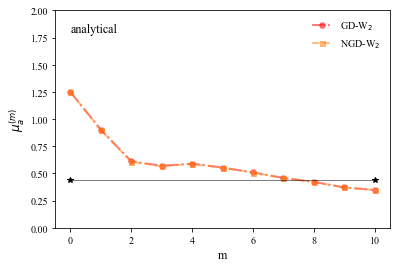

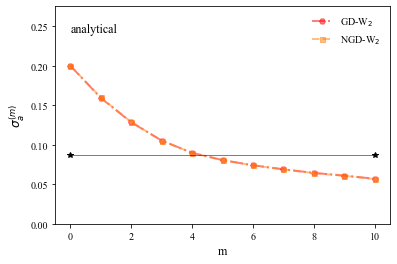

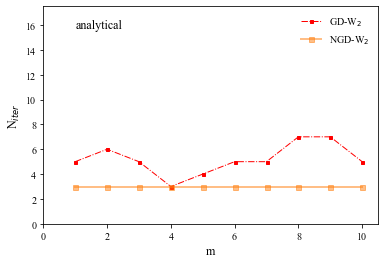

In [157]:
plt.figure()
iphi = 0
iopt=0
line3, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='red',marker='H',linewidth=2,alpha=.5) 
iopt=1
line4, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#ff7f0e',marker='s',markersize=5,linewidth=2,alpha=.5) 
legend = plt.legend((line3,line4), (r'GD-W$_2$', r'NGD-W$_2$',), loc = 'upper right', frameon = False)

plt.plot([0,10],[abarR[0],abarR[0]],marker='*',color='k',linewidth=.5)
plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\mu_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,2.)
plt.text(0, 1.8, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

plt.figure()
iphi = 1
iopt=0
line3, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='red',marker='H',linewidth=2,alpha=.5) 
iopt=1
line4, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#ff7f0e',marker='s',markersize=5,linewidth=2,alpha=.5)
legend = plt.legend((line3,line4), (r'GD-W$_2$', 'NGD-W$_2$'), loc = 'upper right', frameon = False)

plt.plot([0,10],[stdevR[0],stdevR[0]],marker='*',color='k',linewidth=.5)

plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\sigma_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,.275)
plt.text(0, .2425, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

plt.figure()
iphi = 0
iopt = 0 
line3, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '-.',color='red',marker='s',markersize=3,linewidth=1,alpha=1.)
iopt=1
line4, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '-',color='#ff7f0e',marker='s',markersize=5,linewidth=2,alpha=.5) 
legend = plt.legend((line3,line4), (r'GD-W$_2$', 'NGD-W$_2$',), loc = 'upper right', frameon = False)
plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'N$_{{iter}}$',fontsize=12, fontname='Times New Roman')
plt.xlim(0,10.5)
plt.ylim(0,17.5)
plt.text(1, 17.5*1.8/2, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

# L2 norm

$D = d_2$ at each assimilation time



In [158]:
idiv = 2
iopt = 0 # no NGD

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


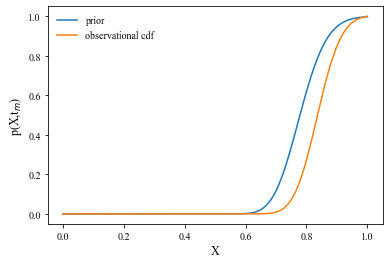

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13


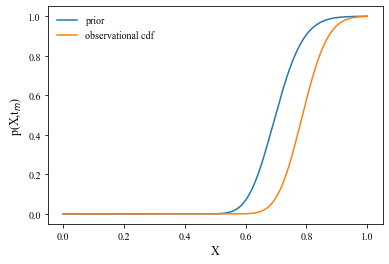

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

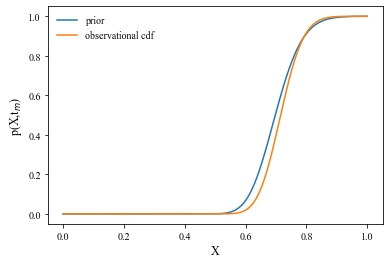

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7


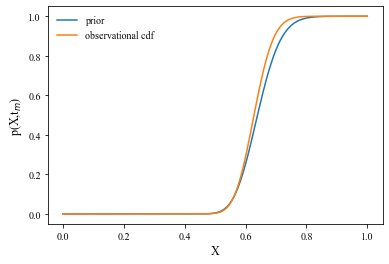

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7


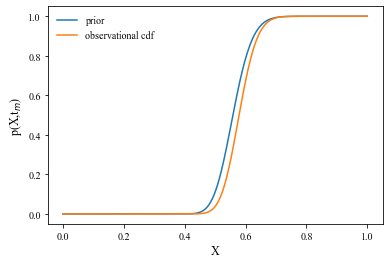

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

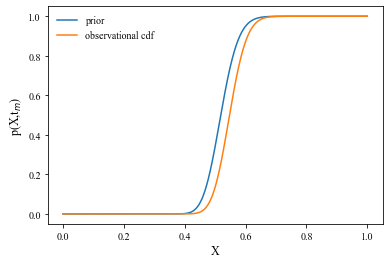

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

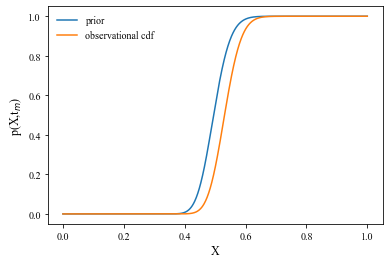

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13


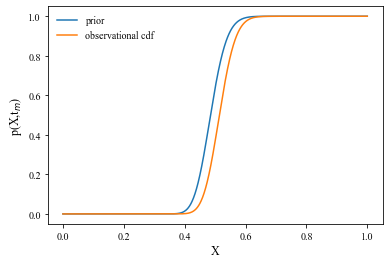

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13


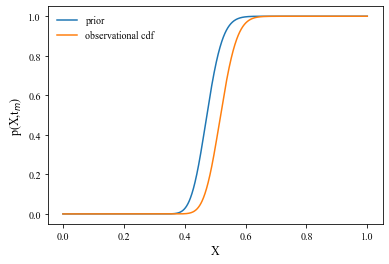

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 14


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

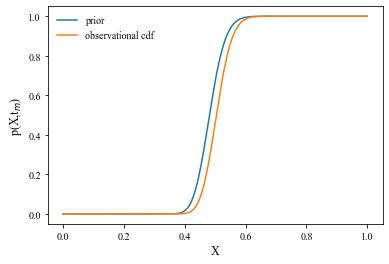

/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 19
         Gradient evaluations: 19


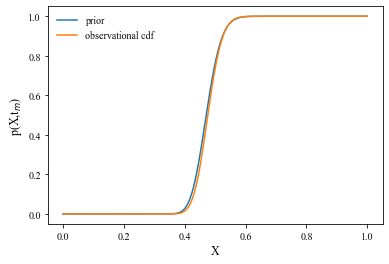

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 19
         Gradient evaluations: 19


/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
/Users/francesca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: Runtime

In [159]:
for imm in range(0,Nmeas):
        
    # current assimilation data
    tm = tmeas[imm]
    dm = obsR[0,imm]
    phicurrent = phiseq[imm,:,iopt,idiv]
    
    NXOBS = 1000
    xx = np.linspace(Xmin,Xmax,NXOBS+1)


    # observational pdf
    normconst = normconstBseq(tm,dm,phicurrent,sdnoise,Xmin,Xmax)
    pobsa = np.zeros(NXOBS+1)
    Fobsa = np.zeros(NXOBS+1)
    Fobsmon = np.zeros(NXOBS+1)
        
    for ix in range(0,NXOBS+1):
        if ix==0:
            pobsa[ix] = 0.
        else:
            pobsa[ix] = pobs(xx[ix],tm,dm,phicurrent,sdnoise,normconst)
        Fobsa[ix] = np.trapz(pobsa[0:ix],x=xx[0:ix]) 
    
    ic = np.argmin(np.abs(xx-analyticalx(X0,tm,phicurrent))) 

    arrL1o = np.array(np.where(pobsa[0:ic] < 0.))
    arrR1o = np.array(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
    arrL2o = np.array(np.where(Fobsa[0:ic] < 0.))
    arrR2o = np.array(np.where(Fobsa[ic:NXOBS+1] > 1.)+ic)

    idL1o = 0
    idL2o = 0
    idR1o = NXOBS
    idR2o = NXOBS
    if arrL1o.size > 0:
        idL1o = np.max(np.where(pobsa[0:ic] < 0.001))
    if arrR1o.size > 0:
        idR1o = np.min(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
    if arrR1o.size > 0:
        idR1o = np.min(np.where(pobsa[ic:NXOBS+1] < 0.)+ic)
    if arrR2o.size > 0:
        idR2o = np.min(np.where(Fobsa[ic:NXOBS+1] > 1.)+ic)
    idLo = np.max([idL1o,idL2o,0])
    idRo = np.min([idR1o,idR2o,NXOBS-1])

    Fobsa[0:idLo] = 0.
    Fobsa[idRo:NXOBS+1] = 1.
    Fobsa[NXOBS] = 1.
    Fobsmon = Fobsa

    normconstnew = normconstBseq(tm,dm,phicurrent,sdnoise,xx[idLo],xx[idRo])

    pobsa = pobsa*normconst/normconstnew

    pobsa[0:idLo] = 0.
    pobsa[idRo:NXOBS+1] = 0.

    x_s = np.zeros((NXOBS+1,1)) 
    phi0_s = np.zeros((NXOBS+1,1)) 
    phi1_s = np.zeros((NXOBS+1,1)) 
    t_s = np.zeros((NXOBS+1,1)) 

    x_s[:,0] = xx
    phi0_s[:,0] = phicurrent[0]
    phi1_s[:,0] = phicurrent[1]
    t_s[:,0] = tm

    # prior at the current assimilation step
    p_s = model0predictPDF(x_s,phi0_s,phi1_s,t_s)
    F_s = model0predictCDF(x_s,phi0_s,phi1_s,t_s)
    pobsa[0] = 0.
    p_s[0] = 0.

    plt.figure()
    line1, = plt.plot(xx,F_s)
    line2, = plt.plot(xx,Fobsa)
    legend = plt.legend((line1,line2), ('prior', 'observational cdf'), loc = 'upper left', frameon = False)
    plt.xlabel('X',fontsize=12, fontname='Times New Roman')
    plt.ylabel(r'p(X,t$_m$)',fontsize=12, fontname='Times New Roman')
    plt.show()

    optout = fmin_ngdFG(loss2,phicurrent,fprime=gradloss2,args=(idiv,tm,dm,phicurrent,sdnoise,),gtol=.038e-02,retall = True, full_output = True)

    phiseq[imm+1,:,iopt,idiv] = np.abs(optout[0])
    Niterations[imm+1,iopt,idiv] = np.shape(optout[5])[0]

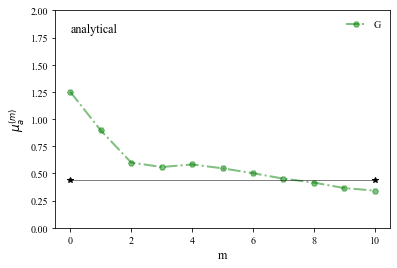

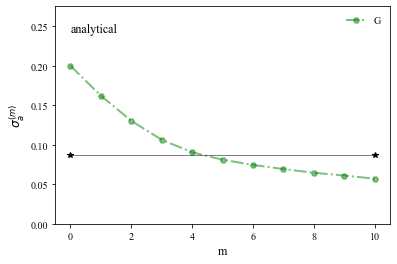

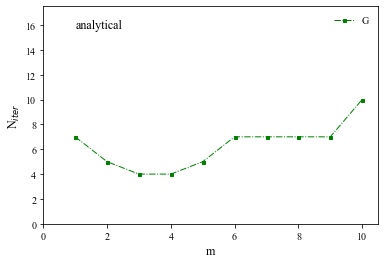

In [160]:
plt.figure()
iphi = 0
iopt=0
line5 = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='green',marker='H',linewidth=2,alpha=.5) 
legend = plt.legend(line5, r'GD-L$_2$', loc = 'upper right', frameon = False)

plt.plot([0,10],[abarR[0],abarR[0]],marker='*',color='k',linewidth=.5)
plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\mu_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,2.)
plt.text(0, 1.8, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

plt.figure()
iphi = 1
iopt=0
line5 = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='green',marker='H',linewidth=2,alpha=.5) 
legend = plt.legend((line5), (r'GD-L$_2$'), loc = 'upper right', frameon = False)

plt.plot([0,10],[stdevR[0],stdevR[0]],marker='*',color='k',linewidth=.5)

plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\sigma_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,.275)
plt.text(0, .2425, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

plt.figure()
iphi = 0
iopt = 0 
line5 = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '-.',color='green',marker='s',markersize=3,linewidth=1,alpha=1.)
legend = plt.legend((line5), (r'GD-L$_2$'), loc = 'upper right', frameon = False)
plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'N$_{{iter}}$',fontsize=12, fontname='Times New Roman')
plt.xlim(0,10.5)
plt.ylim(0,17.5)
plt.text(1, 17.5*1.8/2, 'analytical',fontsize=12, fontname='Times New Roman')
plt.show()

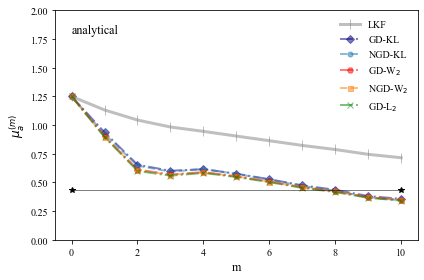

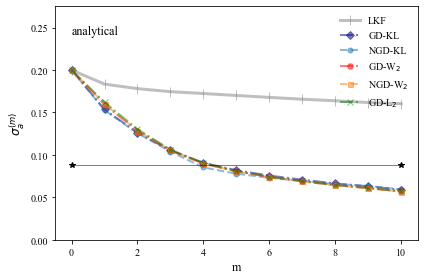

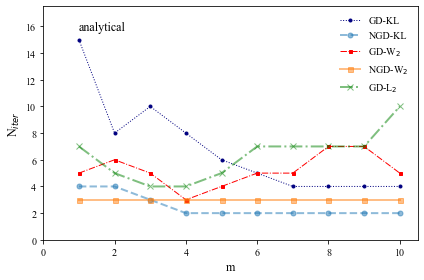

In [161]:
plt.rcParams["font.family"] = "Times New Roman"


KFmua = np.loadtxt('KF_mua.txt')
KFsigmaa = np.loadtxt('KF_sigmaa.txt')

KFmua = np.concatenate((np.array([abarinit]),KFmua))
KFsigmaa = np.concatenate((np.array([astdevinit]),KFsigmaa))

idiv = 0
plt.figure(figsize=(6, 4), tight_layout=True)
# assimilation of the first measurement
iopt = 0
iphi = 0
line1, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='navy',marker='D', linewidth=2,alpha=.5) # this is opt 1 idiv 0
iopt=1
line2, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#1f77b4',marker='o',markersize = 5,linewidth=2,alpha=.5) # this is opt 3 idiv 0

idiv = 1
iopt = 0
iphi = 0
line3, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='red',marker='H',linewidth=2,alpha=.5) # this is opt 1 idiv 0
iopt=1
line4, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#ff7f0e',marker='s',markersize=5,linewidth=2,alpha=.5) # this is opt 1 idiv 0

line0, = plt.plot(KFmua[0:Nmeas],linestyle = '-', color='gray', linewidth = 3, marker='|',markersize = 10, alpha = .5)                

idiv = 2
iopt = 0
iphi = 0
line5, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='green',marker='x', linewidth=2,alpha=.5) # this is opt 1 idiv 0

legend = plt.legend((line0,line1,line2, line3,line4, line5), ('LKF','GD-KL', 'NGD-KL', r'GD-W$_2$', r'NGD-W$_2$', r'GD-L$_2$'), loc = 'upper right', frameon = False)

plt.plot([0,10],[abarR[0],abarR[0]],marker='*',color='k',linewidth=.5)

plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\mu_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,2.)
plt.text(0, 1.8, 'analytical',fontsize=12, fontname='Times New Roman')
plt.savefig('phi0_CGvsNGD_KLvsW2_P1_NOCONJ_REMAPPED2_Ndiv3.png',dpi=600)

idiv = 0
plt.figure(figsize=(6, 4), tight_layout=True)
# assimilation of the first measurement
iopt = 0
iphi = 1
line1, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='navy',marker='D', linewidth=2,alpha=.5) # this is opt 1 idiv 0
iopt=1
line2, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#1f77b4',marker='o',markersize = 5,linewidth=2,alpha=.5) # this is opt 3 idiv 0

idiv = 1
iopt = 0
iphi = 1
line3, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='red',marker='H',linewidth=2,alpha=.5) # this is opt 1 idiv 0
iopt=1
line4, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '--',color='#ff7f0e',marker='s',markersize=5,linewidth=2,alpha=.5) # this is opt 1 idiv 0

line0, = plt.plot(KFsigmaa[0:Nmeas],linestyle = '-', color='gray', linewidth = 3, marker='|',markersize = 10, alpha = .5)                


idiv = 2
iopt = 0
iphi = 1
line5, = plt.plot(phiseq[0:Nmeas,iphi,iopt,idiv],linestyle = '-.',color='green',marker='x', linewidth=2,alpha=.5) # this is opt 1 idiv 0

legend = plt.legend((line0,line1,line2, line3,line4, line5), ('LKF','GD-KL', 'NGD-KL', r'GD-W$_2$', 'NGD-W$_2$', 'GD-L$_2$'), loc = 'upper right', frameon = False)
#
plt.plot([0,10],[stdevR[0],stdevR[0]],marker='*',color='k',linewidth=.5)

plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'$\sigma_a^{(m)}$',fontsize=12, fontname='Times New Roman')
plt.xlim(-.5,10.5)
plt.ylim(0,.275)
plt.text(0, .2425, 'analytical',fontsize=12, fontname='Times New Roman')
plt.savefig('phi1_CGvsNGD_KLvsW2_P1_NOCONJ_REMAPPED2_Ndiv3.png',dpi=600)


idiv = 0
plt.figure(figsize=(6, 4), tight_layout=True)
# assimilation of the first measurement
iopt = 0
iphi = 0
line1, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = ':',color='navy',marker='o',markersize = 3, linewidth=1,alpha=1.) # this is opt 1 idiv 0
iopt=1
line2, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '--',color='#1f77b4',marker='o',markersize = 5,linewidth=2,alpha=.5) # this is opt 3 idiv 0

idiv = 1
iopt = 0
iphi = 0
line3, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '-.',color='red',marker='s',markersize=3,linewidth=1,alpha=1.) # this is opt 1 idiv 0
iopt=1
line4, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '-',color='#ff7f0e',marker='s',markersize=5,linewidth=2,alpha=.5) # this is opt 1 idiv 0

idiv = 2
iopt = 0
iphi = 0
line5, = plt.plot(np.arange(1,Nmeas),Niterations[1:Nmeas,iopt,idiv],linestyle = '-.',color='green',marker='x', linewidth=2,alpha=.5) # this is opt 1 idiv 0

legend = plt.legend((line1,line2, line3,line4, line5), ('GD-KL', 'NGD-KL', r'GD-W$_2$', 'NGD-W$_2$', 'GD-L$_2$'), loc = 'upper right', frameon = False)

plt.xlabel(r'm',fontsize=12, fontname='Times New Roman')
plt.ylabel(r'N$_{{iter}}$',fontsize=12, fontname='Times New Roman')
plt.xlim(0,10.5)
plt.ylim(0,17.5)
plt.text(1, 17.5*1.8/2, 'analytical',fontsize=12, fontname='Times New Roman')
plt.savefig('Niterations_CGvsNGD_KLvsW2_P1_NOCONJ_REMAPPED2_Ndiv3.png',dpi=600)

